In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
etf = pd.read_pickle("ETF_final.pickle").pct_change(fill_method=None).dropna()

In [3]:
sample = etf.loc[:,('SPY', 'TLT',"SHY", "GLD","GSG","VNQ","BIL","DBA")]
sample

,SPY,TLT,SHY,GLD,GSG,VNQ,BIL,DBA
2007-06-01,0.004957,-0.009146,-0.004121,0.013732,0.008981,0.001393,0.000218,0.001518
2007-06-04,0.000130,0.004557,0.000376,0.001505,0.012750,0.004048,0.000218,-0.006063
2007-06-05,-0.003958,-0.006281,-0.000878,-0.002555,-0.002209,-0.015873,0.000000,0.003050
2007-06-06,-0.010750,-0.000468,0.001255,0.000603,0.000548,-0.006784,0.000436,-0.007602
2007-06-07,-0.018045,-0.017916,-0.001128,-0.017317,0.000476,-0.031447,-0.000218,0.017235
...,...,...,...,...,...,...,...,...
2023-04-25,-0.015874,0.014704,0.003901,0.005086,-0.018155,-0.009871,-0.000109,-0.003324
2023-04-26,-0.004236,-0.010658,-0.001214,-0.005437,-0.020490,-0.009600,0.000218,0.001429
2023-04-27,0.019908,-0.009923,-0.001945,0.000054,0.001531,0.022617,0.000327,-0.001903
2023-04-28,0.008535,0.016131,0.001096,0.000271,0.014264,0.012274,0.000000,-0.001430


In [25]:
rolling_corr = sample.rolling(window=21*6).corr()
rolling_corr_drop = rolling_corr.dropna()
rolling_corr_drop

SPY       TLT       SHY       GLD       GSG       VNQ   
2007-11-28 SPY  1.000000 -0.373144 -0.518574  0.310455  0.037306  0.802973  \
           TLT -0.373144  1.000000  0.612259 -0.074557  0.070821 -0.293515   
           SHY -0.518574  0.612259  1.000000 -0.260306 -0.041881 -0.363692   
           GLD  0.310455 -0.074557 -0.260306  1.000000  0.439599  0.032941   
           GSG  0.037306  0.070821 -0.041881  0.439599  1.000000 -0.180438   
...                  ...       ...       ...       ...       ...       ...   
2023-05-01 GLD  0.202301  0.376316  0.608155  1.000000  0.219945  0.189595   
           GSG  0.385549 -0.087420 -0.039095  0.219945  1.000000  0.280409   
           VNQ  0.844529  0.188775  0.158471  0.189595  0.280409  1.000000   
           BIL -0.019120  0.092183  0.244734 -0.103929 -0.075227  0.056751   
           DBA  0.260733 -0.038024 -0.082646  0.020617  0.528989  0.212591   

                     BIL       DBA  
2007-11-28 SPY -0.137526  0.149618  
           TLT  0.172371 -0.215289  
           SHY  0.520517 -0.173934  
           GLD -0.149384  0.350282  
           GSG -0.050024  0.450340  
...                  ...       ...  
2023-05-01 GLD -0.103929  0.020617  
           GSG -0.075227  0.528989  
           VNQ  0.056751  0.212591  
           BIL  1.000000  0.098664  
           DBA  0.098664  1.000000  

[31056 rows x 8 columns]

In [26]:
# 8개 컬럼중에 앞에서 4개만 가져오기
corr_values = rolling_corr_drop.loc[:, ('SPY', 'TLT',"SHY", "GLD")]  #('VTI', 'TLT',"SHY")
corr_matrix = corr_values.unstack()

In [27]:
corr_matrix_T = corr_matrix.T
corr_matrix_T

2007-11-28  2007-11-29  2007-11-30  2007-12-03  2007-12-04   
SPY BIL   -0.137526   -0.138414   -0.136550   -0.115048   -0.113318  \
    DBA    0.149618    0.149686    0.146256    0.144528    0.131854   
    GLD    0.310455    0.304402    0.293104    0.286680    0.278130   
    GSG    0.037306    0.035171    0.022886    0.020236    0.031422   
    SHY   -0.518574   -0.522112   -0.519569   -0.516895   -0.512272   
    SPY    1.000000    1.000000    1.000000    1.000000    1.000000   
    TLT   -0.373144   -0.368858   -0.373247   -0.379104   -0.380079   
    VNQ    0.802973    0.801022    0.802123    0.802741    0.804039   
TLT BIL    0.172371    0.168005    0.165278    0.144718    0.145291   
    DBA   -0.215289   -0.215573   -0.209565   -0.207413   -0.209132   
    GLD   -0.074557   -0.076326   -0.067447   -0.066671   -0.067769   
    GSG    0.070821    0.076053    0.082633    0.082017    0.082898   
    SHY    0.612259    0.606601    0.604344    0.596735    0.598825   
    SPY   -0.373144   -0.368858   -0.373247   -0.379104   -0.380079   
    TLT    1.000000    1.000000    1.000000    1.000000    1.000000   
    VNQ   -0.293515   -0.299310   -0.307558   -0.317332   -0.314264   
SHY BIL    0.520517    0.531378    0.531466    0.528521    0.526810   
    DBA   -0.173934   -0.177803   -0.178066   -0.179957   -0.178304   
    GLD   -0.260306   -0.253919   -0.253713   -0.261368   -0.262151   
    GSG   -0.041881   -0.031897   -0.033946   -0.038550   -0.033760   
    SHY    1.000000    1.000000    1.000000    1.000000    1.000000   
    SPY   -0.518574   -0.522112   -0.519569   -0.516895   -0.512272   
    TLT    0.612259    0.606601    0.604344    0.596735    0.598825   
    VNQ   -0.363692   -0.374969   -0.370466   -0.371600   -0.365858   
GLD BIL   -0.149384   -0.140521   -0.141814   -0.161971   -0.158788   
    DBA    0.350282    0.347923    0.350575    0.352931    0.360525   
    GLD    1.000000    1.000000    1.000000    1.000000    1.000000   
    GSG    0.439599    0.435482    0.445693    0.446609    0.418076   
    SHY   -0.260306   -0.253919   -0.253713   -0.261368   -0.262151   
    SPY    0.310455    0.304402    0.293104    0.286680    0.278130   
    TLT   -0.074557   -0.076326   -0.067447   -0.066671   -0.067769   
    VNQ    0.032941    0.041095    0.026255    0.020265    0.007926   

         2007-12-05  2007-12-06  2007-12-07  2007-12-10  2007-12-11  ...   
SPY BIL   -0.116164   -0.115840   -0.116232   -0.127037   -0.158724  ...  \
    DBA    0.145358    0.151258    0.149345    0.152061    0.144806  ...   
    GLD    0.248358    0.270938    0.269692    0.269065    0.285214  ...   
    GSG    0.033011    0.071332    0.070378    0.063953    0.045772  ...   
    SHY   -0.524245   -0.533897   -0.532258   -0.541755   -0.562389  ...   
    SPY    1.000000    1.000000    1.000000    1.000000    1.000000  ...   
    TLT   -0.445210   -0.452939   -0.446569   -0.478294   -0.529695  ...   
    VNQ    0.803958    0.806017    0.808499    0.807748    0.814423  ...   
TLT BIL    0.142624    0.139154    0.125823    0.116710    0.132576  ...   
    DBA   -0.182026   -0.183598   -0.196181   -0.197284   -0.207184  ...   
    GLD   -0.092932   -0.104551   -0.085646   -0.117582   -0.153034  ...   
    GSG    0.079592    0.049046    0.067754    0.070168    0.080063  ...   
    SHY    0.590165    0.597454    0.600357    0.603233    0.627140  ...   
    SPY   -0.445210   -0.452939   -0.446569   -0.478294   -0.529695  ...   
    TLT    1.000000    1.000000    1.000000    1.000000    1.000000  ...   
    VNQ   -0.382188   -0.393414   -0.390519   -0.421686   -0.476492  ...   
SHY BIL    0.526934    0.519735    0.511203    0.510426    0.522136  ...   
    DBA   -0.171409   -0.171719   -0.179431   -0.179241   -0.178832  ...   
    GLD   -0.277211   -0.284349   -0.275549   -0.286890   -0.303815  ...   
    GSG   -0.034204   -0.057547   -0.050005   -0.047594   -0.034620  ...   
    SHY    1.000000    1.000000    1.000000    1.000000    1.000000  

In [28]:
corr_matrix_T.index.get_level_values(0)

Index(['SPY', 'SPY', 'SPY', 'SPY', 'SPY', 'SPY', 'SPY', 'SPY', 'TLT', 'TLT',
       'TLT', 'TLT', 'TLT', 'TLT', 'TLT', 'TLT', 'SHY', 'SHY', 'SHY', 'SHY',
       'SHY', 'SHY', 'SHY', 'SHY', 'GLD', 'GLD', 'GLD', 'GLD', 'GLD', 'GLD',
       'GLD', 'GLD'],
      dtype='object')

In [29]:
# 자기자신과의 corr은 1이기 때문에 Drop
corr_matrix_T_drop = corr_matrix_T.drop([("SPY","SPY"),        #("VTI","VTI"),   ("Stock","Stock"),
                                         ("TLT","TLT"),    #("TLT","TLT"),  ("Bond_20+","Bond_20+")
                                         ("SHY","SHY"),
                                         ("GLD","GLD")])   #("SHY","SHY")     ("Bond_1+","Bond_1+")
corr_matrix_T_drop

2007-11-28  2007-11-29  2007-11-30  2007-12-03  2007-12-04   
SPY BIL   -0.137526   -0.138414   -0.136550   -0.115048   -0.113318  \
    DBA    0.149618    0.149686    0.146256    0.144528    0.131854   
    GLD    0.310455    0.304402    0.293104    0.286680    0.278130   
    GSG    0.037306    0.035171    0.022886    0.020236    0.031422   
    SHY   -0.518574   -0.522112   -0.519569   -0.516895   -0.512272   
    TLT   -0.373144   -0.368858   -0.373247   -0.379104   -0.380079   
    VNQ    0.802973    0.801022    0.802123    0.802741    0.804039   
TLT BIL    0.172371    0.168005    0.165278    0.144718    0.145291   
    DBA   -0.215289   -0.215573   -0.209565   -0.207413   -0.209132   
    GLD   -0.074557   -0.076326   -0.067447   -0.066671   -0.067769   
    GSG    0.070821    0.076053    0.082633    0.082017    0.082898   
    SHY    0.612259    0.606601    0.604344    0.596735    0.598825   
    SPY   -0.373144   -0.368858   -0.373247   -0.379104   -0.380079   
    VNQ   -0.293515   -0.299310   -0.307558   -0.317332   -0.314264   
SHY BIL    0.520517    0.531378    0.531466    0.528521    0.526810   
    DBA   -0.173934   -0.177803   -0.178066   -0.179957   -0.178304   
    GLD   -0.260306   -0.253919   -0.253713   -0.261368   -0.262151   
    GSG   -0.041881   -0.031897   -0.033946   -0.038550   -0.033760   
    SPY   -0.518574   -0.522112   -0.519569   -0.516895   -0.512272   
    TLT    0.612259    0.606601    0.604344    0.596735    0.598825   
    VNQ   -0.363692   -0.374969   -0.370466   -0.371600   -0.365858   
GLD BIL   -0.149384   -0.140521   -0.141814   -0.161971   -0.158788   
    DBA    0.350282    0.347923    0.350575    0.352931    0.360525   
    GSG    0.439599    0.435482    0.445693    0.446609    0.418076   
    SHY   -0.260306   -0.253919   -0.253713   -0.261368   -0.262151   
    SPY    0.310455    0.304402    0.293104    0.286680    0.278130   
    TLT   -0.074557   -0.076326   -0.067447   -0.066671   -0.067769   
    VNQ    0.032941    0.041095    0.026255    0.020265    0.007926   

         2007-12-05  2007-12-06  2007-12-07  2007-12-10  2007-12-11  ...   
SPY BIL   -0.116164   -0.115840   -0.116232   -0.127037   -0.158724  ...  \
    DBA    0.145358    0.151258    0.149345    0.152061    0.144806  ...   
    GLD    0.248358    0.270938    0.269692    0.269065    0.285214  ...   
    GSG    0.033011    0.071332    0.070378    0.063953    0.045772  ...   
    SHY   -0.524245   -0.533897   -0.532258   -0.541755   -0.562389  ...   
    TLT   -0.445210   -0.452939   -0.446569   -0.478294   -0.529695  ...   
    VNQ    0.803958    0.806017    0.808499    0.807748    0.814423  ...   
TLT BIL    0.142624    0.139154    0.125823    0.116710    0.132576  ...   
    DBA   -0.182026   -0.183598   -0.196181   -0.197284   -0.207184  ...   
    GLD   -0.092932   -0.104551   -0.085646   -0.117582   -0.153034  ...   
    GSG    0.079592    0.049046    0.067754    0.070168    0.080063  ...   
    SHY    0.590165    0.597454    0.600357    0.603233    0.627140  ...   
    SPY   -0.445210   -0.452939   -0.446569   -0.478294   -0.529695  ...   
    VNQ   -0.382188   -0.393414   -0.390519   -0.421686   -0.476492  ...   
SHY BIL    0.526934    0.519735    0.511203    0.510426    0.522136  ...   
    DBA   -0.171409   -0.171719   -0.179431   -0.179241   -0.178832  ...   
    GLD   -0.277211   -0.284349   -0.275549   -0.286890   -0.303815  ...   
    GSG   -0.034204   -0.057547   -0.050005   -0.047594   -0.034620  ...   
    SPY   -0.524245   -0.533897   -0.532258   -0.541755   -0.562389  ...   
    TLT    0.590165    0.597454    0.600357    0.603233    0.627140  ...   
    VNQ   -0.375604   -0.388253   -0.387423   -0.396775   -0.423804  ...   
GLD BIL   -0.163088   -0.160135   -0.168716   -0.183470   -0.200408  ...   
    DBA    0.383846    0.381905    0.363335    0.365376    0.362233  ...   
    GSG    0.418557    0.407445    0.410333    0.395754    0.382286  ...   
    SHY   -0.277211   -0.284349   -0.275549   -0.

In [30]:
# ("TLT","VTI"), ("SHY","VTI"), ("SHY","TLT")는 두번 포함되기 때문에 드랍
corr_matrix_T_drop2 = corr_matrix_T_drop.drop([("GLD","SPY"),  #("TLT","VTI"),     ("Bond_20+","Stock")
                                               ("GLD","SHY"),  #("SHY","VTI"),      ("Bond_1+","Stock")
                                               ("GLD","TLT"),
                                               ("SHY","TLT"),
                                               ("SHY","SPY"),
                                               ("TLT","SPY")]) #("SHY","TLT")    ("Bond_1+","Bond_20+")
corr_matrix_T_drop2

2007-11-28  2007-11-29  2007-11-30  2007-12-03  2007-12-04   
SPY BIL   -0.137526   -0.138414   -0.136550   -0.115048   -0.113318  \
    DBA    0.149618    0.149686    0.146256    0.144528    0.131854   
    GLD    0.310455    0.304402    0.293104    0.286680    0.278130   
    GSG    0.037306    0.035171    0.022886    0.020236    0.031422   
    SHY   -0.518574   -0.522112   -0.519569   -0.516895   -0.512272   
    TLT   -0.373144   -0.368858   -0.373247   -0.379104   -0.380079   
    VNQ    0.802973    0.801022    0.802123    0.802741    0.804039   
TLT BIL    0.172371    0.168005    0.165278    0.144718    0.145291   
    DBA   -0.215289   -0.215573   -0.209565   -0.207413   -0.209132   
    GLD   -0.074557   -0.076326   -0.067447   -0.066671   -0.067769   
    GSG    0.070821    0.076053    0.082633    0.082017    0.082898   
    SHY    0.612259    0.606601    0.604344    0.596735    0.598825   
    VNQ   -0.293515   -0.299310   -0.307558   -0.317332   -0.314264   
SHY BIL    0.520517    0.531378    0.531466    0.528521    0.526810   
    DBA   -0.173934   -0.177803   -0.178066   -0.179957   -0.178304   
    GLD   -0.260306   -0.253919   -0.253713   -0.261368   -0.262151   
    GSG   -0.041881   -0.031897   -0.033946   -0.038550   -0.033760   
    VNQ   -0.363692   -0.374969   -0.370466   -0.371600   -0.365858   
GLD BIL   -0.149384   -0.140521   -0.141814   -0.161971   -0.158788   
    DBA    0.350282    0.347923    0.350575    0.352931    0.360525   
    GSG    0.439599    0.435482    0.445693    0.446609    0.418076   
    VNQ    0.032941    0.041095    0.026255    0.020265    0.007926   

         2007-12-05  2007-12-06  2007-12-07  2007-12-10  2007-12-11  ...   
SPY BIL   -0.116164   -0.115840   -0.116232   -0.127037   -0.158724  ...  \
    DBA    0.145358    0.151258    0.149345    0.152061    0.144806  ...   
    GLD    0.248358    0.270938    0.269692    0.269065    0.285214  ...   
    GSG    0.033011    0.071332    0.070378    0.063953    0.045772  ...   
    SHY   -0.524245   -0.533897   -0.532258   -0.541755   -0.562389  ...   
    TLT   -0.445210   -0.452939   -0.446569   -0.478294   -0.529695  ...   
    VNQ    0.803958    0.806017    0.808499    0.807748    0.814423  ...   
TLT BIL    0.142624    0.139154    0.125823    0.116710    0.132576  ...   
    DBA   -0.182026   -0.183598   -0.196181   -0.197284   -0.207184  ...   
    GLD   -0.092932   -0.104551   -0.085646   -0.117582   -0.153034  ...   
    GSG    0.079592    0.049046    0.067754    0.070168    0.080063  ...   
    SHY    0.590165    0.597454    0.600357    0.603233    0.627140  ...   
    VNQ   -0.382188   -0.393414   -0.390519   -0.421686   -0.476492  ...   
SHY BIL    0.526934    0.519735    0.511203    0.510426    0.522136  ...   
    DBA   -0.171409   -0.171719   -0.179431   -0.179241   -0.178832  ...   
    GLD   -0.277211   -0.284349   -0.275549   -0.286890   -0.303815  ...   
    GSG   -0.034204   -0.057547   -0.050005   -0.047594   -0.034620  ...   
    VNQ   -0.375604   -0.388253   -0.387423   -0.396775   -0.423804  ...   
GLD BIL   -0.163088   -0.160135   -0.168716   -0.183470   -0.200408  ...   
    DBA    0.383846    0.381905    0.363335    0.365376    0.362233  ...   
    GSG    0.418557    0.407445    0.410333    0.395754    0.382286  ...   
    VNQ   -0.026935   -0.009580   -0.005372    0.000690    0.026319  ...   

         2023-04-18  2023-04-19  2023-04-20  2023-04-21  2023-04-24   
SPY BIL   -0.035651   -0.036030   -0.040254   -0.040449   -0.036900  \
    DBA    0.255503    0.259779    0.263785    0.261123    0.261114   
    GLD    0.229421    0.231318    0.230366    0.223978    0.222663   
    GSG    0.338879    0.346087    0.357713    0.359056    0.360171   
    SHY    0.116662    0.111043    0.104597    0.100156    0.096783   
    TLT    0.125656    0.134747    0.131187    0.124602    0.116834   
    VNQ    0.833583    0.826833    0.826570    0.828335    0.828396   
TLT BIL   -0.008479   -0.008677   -0.003332   -0.002970   

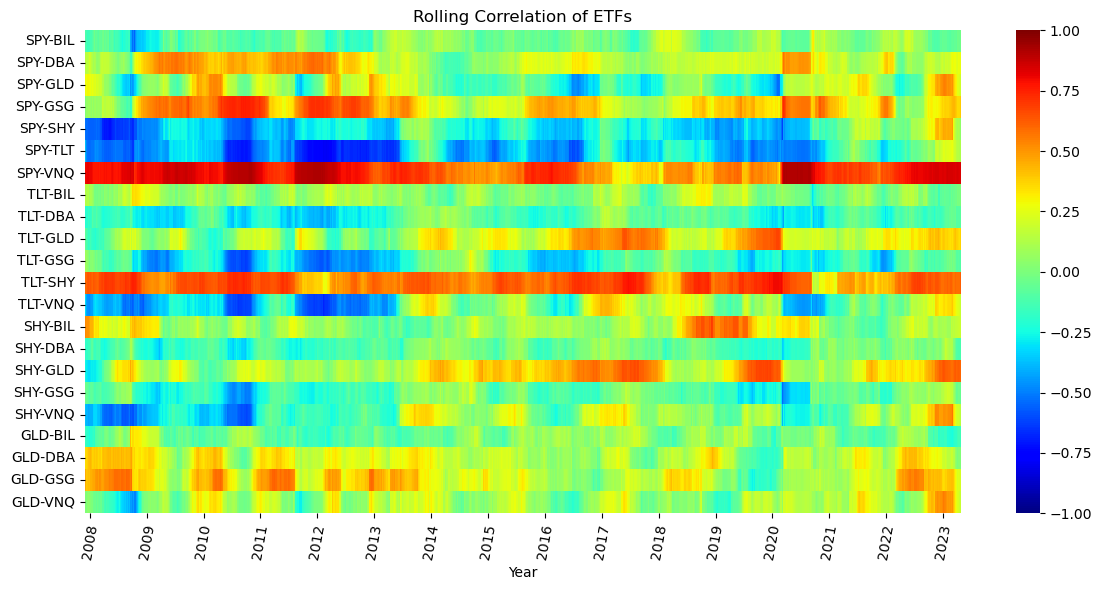

In [50]:
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix_T_drop2, 
            cmap="jet",
            vmin=-1,
            vmax=1)

plt.title("Rolling Correlation of ETFs")
plt.xticks(rotation="80", 
           ticks=np.arange(23,(23+252*16),252), # 1년에는 주식이 보통 252일 열린다
           labels=["2008", "2009","2010","2011","2012","2013",
                   "2014","2015","2016","2017","2018","2019",
                   "2020","2021","2022","2023"])
plt.xlabel("Year")
plt.ylabel(None)
plt.tight_layout();

In [32]:
# 주목할 만한 애들만 뽑아보자
corr_matrix_T_drop3 = corr_matrix_T_drop2.loc[[("SPY", "BIL"),
                                               ("SPY", "SHY"),
                                               ("SPY", "TLT"),
                                               ("SPY", "GLD"),
                                               ("SPY", "GSG"),
                                               ("SPY", "DBA"),
                                               ("SPY", "VNQ")]]

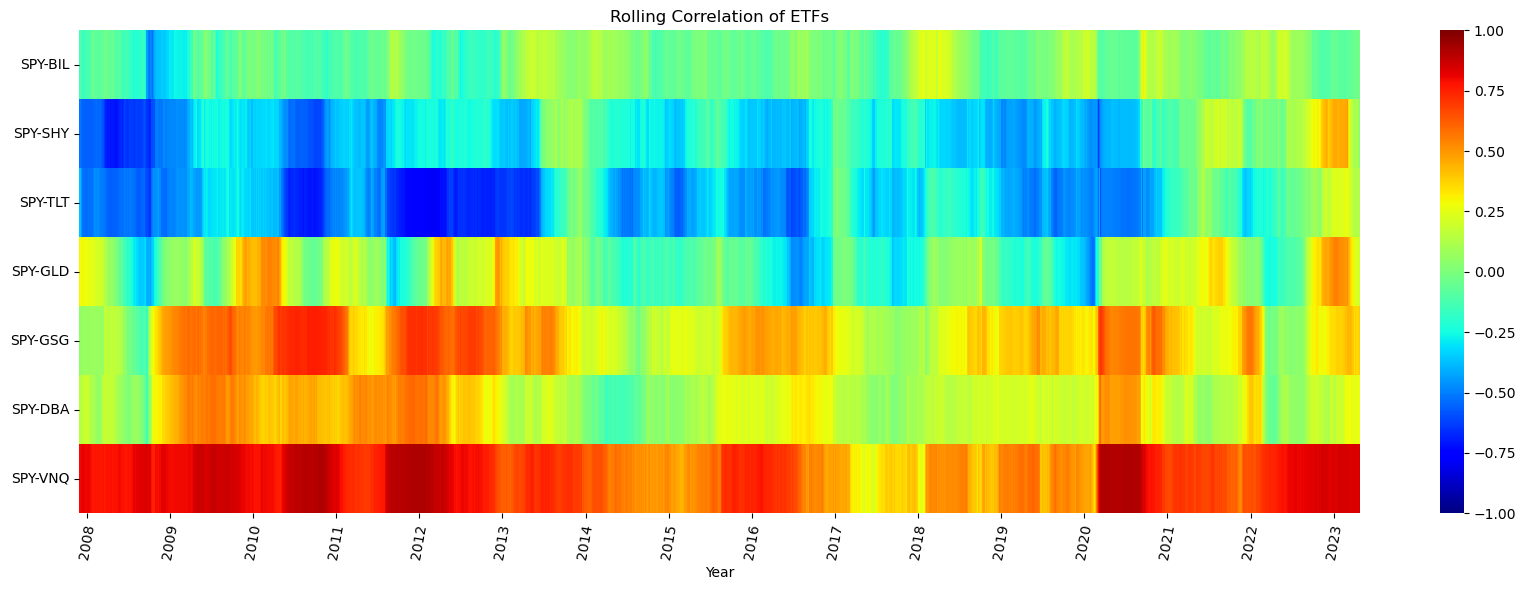

In [52]:
plt.figure(figsize=(17,6))
sns.heatmap(corr_matrix_T_drop3, 
            cmap="jet",
            vmin=-1,
            vmax=1)

plt.title("Rolling Correlation of ETFs")
plt.xticks(rotation="80", 
           ticks=np.arange(23,(23+252*16),252), # 1년에는 주식이 보통 252일 열린다
           labels=["2008", "2009","2010","2011","2012","2013",
                   "2014","2015","2016","2017","2018","2019",
                   "2020","2021","2022","2023"])
plt.xlabel("Year")
plt.ylabel(None)
plt.yticks(rotation="0")

#plt.axvline(252*3 + 21*7,c="k")
#plt.axvline(252*3 + 21*10, c="k")


plt.tight_layout();

In [37]:
# 주목할 만한 애들만 뽑아보자
corr_matrix_T_drop4 = corr_matrix_T_drop2.loc[[("TLT", "BIL"),
                                               ("TLT", "SHY"),
                                               ("SHY", "BIL"), # 채권들 간의 상관관계
                                               ("TLT", "GLD"),
                                               ("TLT", "GSG"),
                                               ("SHY", "GLD"),
                                               ("SHY", "GSG"),
                                               ]]

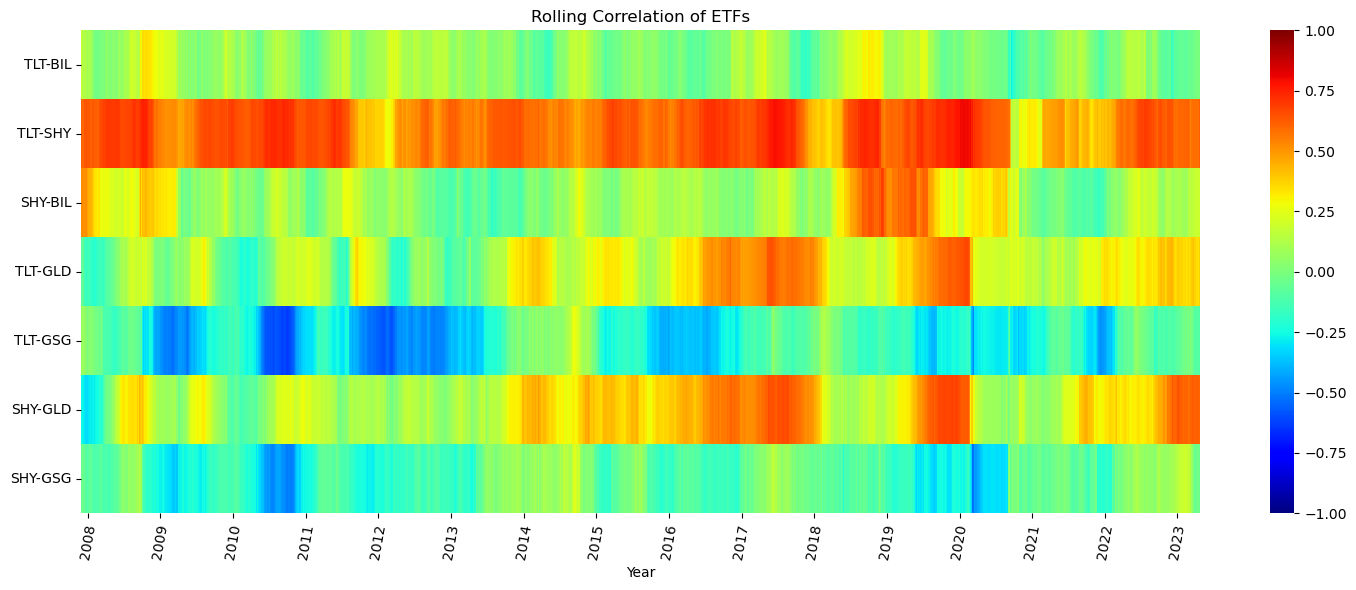

In [53]:
plt.figure(figsize=(15,6))
sns.heatmap(corr_matrix_T_drop4, 
            cmap="jet",
            vmin=-1,
            vmax=1)

plt.title("Rolling Correlation of ETFs")
plt.xticks(rotation="80", 
           ticks=np.arange(23,(23+252*16),252), # 1년에는 주식이 보통 252일 열린다
           labels=["2008", "2009","2010","2011","2012","2013",
                   "2014","2015","2016","2017","2018","2019",
                   "2020","2021","2022","2023"])
plt.xlabel("Year")
plt.ylabel(None)
plt.yticks(rotation="0")

plt.tight_layout();